In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers
import pandas as pd 
import numpy as np 
from numpy import shape
from numpy import array
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.image as img
from PIL import Image
from sklearn.metrics import accuracy_score

In [2]:
import PIL

In [3]:
df = pd.read_csv('data.csv',header= None, names = ['photos','angle','time'])

In [4]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [5]:
import random

xs = []
ys = []

#read data.txt
with open("data.txt") as f:
    for line in f:
        xs.append(line.split()[0])
        ys.append(float(line.split()[1].split(',')[0]))

#get number of images
num_images = len(xs)

"""#shuffle list of images
c = list(zip(xs, ys))
random.shuffle(c)
xs, ys = zip(*c)
"""
#scaling the y_label
y = []
mi = min(ys)
ma = max(ys)
for i in ys:
    y.append((i-mi)/(ma-mi))
Y = np.array(y)

#scaling x_label and changing to grayscale
x = []
for i in xs :
    ab = 'data/'+str(i)
    img = Image.open(ab)
    current_width, current_height = img.size
    new_width, new_height = 101,56
    resized_img = img.resize((new_width, new_height))
    resized_img = np.array(resized_img)
    im = rgb2gray(resized_img)
    x.append(im)

train_x = x[:int(len(x) * 0.8)]
train_y = Y[:int(len(x) * 0.8)]

test_x = x[-int(len(x) * 0.2):]
test_y = Y[-int(len(x) * 0.2):]


In [6]:
'''#scaling example for single image
from PIL import Image
ab = 'data/'+str(train_xs[0])
img = Image.open(ab)
current_width, current_height = img.size
new_width, new_height = 100,100
resized_img = img.resize((new_width, new_height))
resized_img = np.array(resized_img)
rgb2gray(resized_img)'''

"#scaling example for single image\nfrom PIL import Image\nab = 'data/'+str(train_xs[0])\nimg = Image.open(ab)\ncurrent_width, current_height = img.size\nnew_width, new_height = 100,100\nresized_img = img.resize((new_width, new_height))\nresized_img = np.array(resized_img)\nrgb2gray(resized_img)"

In [7]:
shape(train_x[1])

(56, 101)

In [8]:
shape(train_x)

(51060, 56, 101)

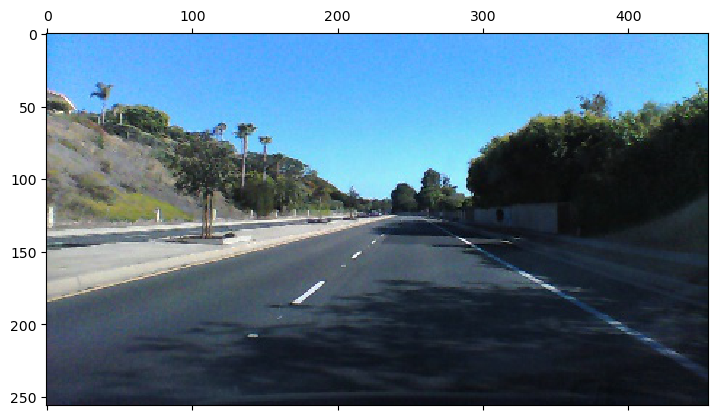

In [9]:
ab = 'data/'+str(xs[1])
img = Image.open(ab)
temp = np.array(img)
plt.matshow(temp)

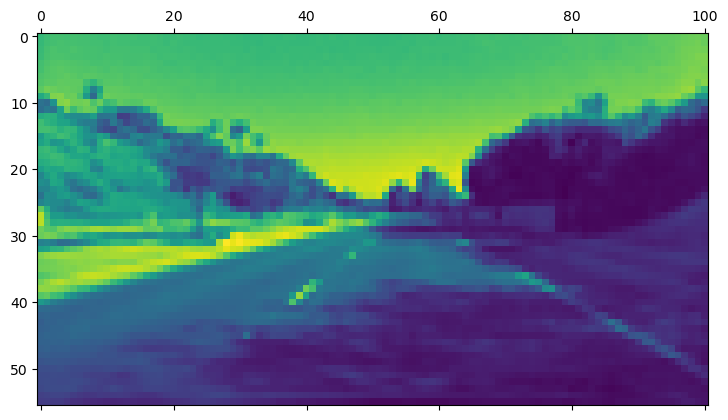

In [10]:
plt.matshow(x[1])

In [11]:
shape(train_x)

(51060, 56, 101)

In [12]:
shape(train_x[2])

(56, 101)

In [13]:
'''c = 0
for i in train_x:
    if shape(i) != (56, 101):
        c+=1
c'''
train_x = np.expand_dims(train_x,axis = 3)

In [14]:
shape(train_x)

(51060, 56, 101, 1)

In [15]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.0002,0.5)
from tensorflow.keras.layers import LeakyReLU
acti = LeakyReLU(alpha = 0.2)

In [16]:
'''model = Sequential([
    keras.layers.Conv2D(input_shape = (56,101,1),filters = 64,kernel_size = (3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    ])'''

model = Sequential([
    keras.layers.Conv2D(input_shape = (56,101,1),filters = 16,kernel_size = (3,3),activation = acti),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 16,kernel_size = (3,3),activation = acti),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation = acti),
    keras.layers.Dense(1,activation = 'sigmoid')
    ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 99, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 99, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 47, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 47, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4416)              0

In [18]:
model.compile(loss = 'mean_squared_error',optimizer = adam)

In [21]:
epoch = 4000
batch_size = 128

for i in range(epoch):
    x_index = np.random.randint(0,shape(train_x)[0],batch_size)
    rand_train_images = train_x[x_index]
    train_labels = train_y[x_index]
    
    model.predict(rand_train_images)
    
    loss = model.train_on_batch(rand_train_images,train_labels)
    
    #print('ehoch no. ',i,' loss ',loss[0],' accuracy ',100*loss[1])
    
    print(i, loss)

0 0.0032147583551704884
1 0.005642708390951157
2 0.00956430472433567
3 0.007165646180510521
4 0.006640138104557991
5 0.004381844308227301
6 0.007102276664227247
7 0.00890224240720272
8 0.006781954783946276
9 0.003987711388617754
10 0.0036799954250454903
11 0.005133571568876505
12 0.007699882611632347
13 0.006401723716408014
14 0.006358901038765907
15 0.0075279949232935905
16 0.009542656131088734
17 0.005535670556128025
18 0.004789633676409721
19 0.0029875081963837147
20 0.0018622269853949547
21 0.0016979309730231762
22 0.0019919290207326412
23 0.0009951414540410042
24 0.0012091409880667925
25 0.002121221274137497
26 0.003010769374668598
27 0.00541295250877738
28 0.009220043197274208
29 0.01310812123119831
30 0.02434181049466133
31 0.015596277080476284
32 0.013490177690982819
33 0.00752908643335104
34 0.0060110073536634445
35 0.00617607869207859
36 0.005334259010851383
37 0.007953591644763947
38 0.00824007298797369
39 0.005181812681257725
40 0.005992052610963583
41 0.005196481477469206


331 0.006488747429102659
332 0.008836397901177406
333 0.016065355390310287
334 0.011769707314670086
335 0.016638021916151047
336 0.00665751239284873
337 0.0034532854333519936
338 0.0022056028246879578
339 0.0018072278471663594
340 0.0014033420011401176
341 0.0017913917545229197
342 0.0017171015497297049
343 0.001222898019477725
344 0.0017275337595492601
345 0.0016498074401170015
346 0.0014387419214472175
347 0.003595528192818165
348 0.0026663183234632015
349 0.0028907181695103645
350 0.003956254571676254
351 0.005359781440347433
352 0.005105171352624893
353 0.006202654913067818
354 0.006471295841038227
355 0.008187593892216682
356 0.006284794304519892
357 0.007266300264745951
358 0.005850410088896751
359 0.005965200252830982
360 0.003835300449281931
361 0.002017599530518055
362 0.0031359943095594645
363 0.003600369207561016
364 0.005519120022654533
365 0.009722311049699783
366 0.008507619611918926
367 0.00889270193874836
368 0.0024845318403095007
369 0.0018011650536209345
370 0.0032885

655 0.010389745235443115
656 0.013763640075922012
657 0.009523476473987103
658 0.009628769010305405
659 0.006633805111050606
660 0.007779722101986408
661 0.00550306960940361
662 0.005923141725361347
663 0.003521914128214121
664 0.0030138189904391766
665 0.001992060337215662
666 0.002622770145535469
667 0.0034419831354171038
668 0.0051039657555520535
669 0.006354093551635742
670 0.009381023235619068
671 0.005794650409370661
672 0.006508875638246536
673 0.006083707325160503
674 0.007541815284639597
675 0.007698815315961838
676 0.010101038962602615
677 0.010015400126576424
678 0.012127244845032692
679 0.007250659633427858
680 0.00650994386523962
681 0.007605536840856075
682 0.014994809404015541
683 0.00954206008464098
684 0.006346049718558788
685 0.0020899197552353144
686 0.0021672456059604883
687 0.0015236136969178915
688 0.0017577086109668016
689 0.0016755614196881652
690 0.0018747661961242557
691 0.001310362946242094
692 0.0012249123537912965
693 0.0012243357487022877
694 0.00158282730

980 0.0017808671109378338
981 0.0023544630967080593
982 0.002702871337532997
983 0.004629294387996197
984 0.007281177677214146
985 0.008014027029275894
986 0.01265624538064003
987 0.011545229703187943
988 0.012823008932173252
989 0.009172583930194378
990 0.008952450007200241
991 0.004229403100907803
992 0.0033689045812934637
993 0.0034349700435996056
994 0.004630768671631813
995 0.00567279476672411
996 0.008476563729345798
997 0.0077969469130039215
998 0.010050824843347073
999 0.005588863510638475
1000 0.00446285679936409
1001 0.002981203608214855
1002 0.001260900404304266
1003 0.0019407239742577076
1004 0.002696751384064555
1005 0.0027209753170609474
1006 0.0037649839650839567
1007 0.0043860445730388165
1008 0.005991927348077297
1009 0.0018897082190960646
1010 0.0009295265772379935
1011 0.0012417756952345371
1012 0.0014185612089931965
1013 0.0014382933732122183
1014 0.0018232357688248158
1015 0.0027663460932672024
1016 0.0045281825587153435
1017 0.007236840203404427
1018 0.00721292616

1293 0.0016320723807439208
1294 0.0009325637365691364
1295 0.0006923875771462917
1296 0.0008247552905231714
1297 0.0006117888260632753
1298 0.0009742294205352664
1299 0.0007032394059933722
1300 0.0010273588122799993
1301 0.0005675615975633264
1302 0.0009258324280381203
1303 0.0010341585148125887
1304 0.0015613154973834753
1305 0.0021999068558216095
1306 0.0028455471619963646
1307 0.002073968295007944
1308 0.0017990735359489918
1309 0.0012433091178536415
1310 0.0011352417059242725
1311 0.0006983198691159487
1312 0.0015489382203668356
1313 0.0018811211921274662
1314 0.005010118242353201
1315 0.008588222786784172
1316 0.013859665021300316
1317 0.01012371201068163
1318 0.005682682618498802
1319 0.002940231701359153
1320 0.0011792837176471949
1321 0.0012245919788256288
1322 0.0009411736391484737
1323 0.0006937052821740508
1324 0.0015418622642755508
1325 0.0008531144121661782
1326 0.0012744225095957518
1327 0.0015514440601691604
1328 0.003100653877481818
1329 0.002995925024151802
1330 0.0035

1602 0.001117898733355105
1603 0.000791718193795532
1604 0.0011265987996011972
1605 0.0005798219353891909
1606 0.0007298988639377058
1607 0.0006159887998364866
1608 0.0005833490868099034
1609 0.0008769994601607323
1610 0.0006052062381058931
1611 0.0005985192838124931
1612 0.0005328103434294462
1613 0.0006226312834769487
1614 0.002029889263212681
1615 0.0006624704110436141
1616 0.0006802169373258948
1617 0.0008018297958187759
1618 0.0012230001157149673
1619 0.0012512376997619867
1620 0.0018814429640769958
1621 0.0032478133216500282
1622 0.004812473431229591
1623 0.004658695310354233
1624 0.004932197742164135
1625 0.0031597514171153307
1626 0.002461399883031845
1627 0.0021139979362487793
1628 0.0017928075976669788
1629 0.0022593140602111816
1630 0.0034448166843503714
1631 0.004532385151833296
1632 0.005796434823423624
1633 0.004877104423940182
1634 0.004977300297468901
1635 0.004370212089270353
1636 0.004656113684177399
1637 0.005334129091352224
1638 0.008316639810800552
1639 0.009645674

1913 0.003480763640254736
1914 0.005076593719422817
1915 0.00342904613353312
1916 0.002068793401122093
1917 0.001314031658694148
1918 0.0008961043786257505
1919 0.0007786446367390454
1920 0.0006070758681744337
1921 0.0018368763849139214
1922 0.0008223711047321558
1923 0.0008815019391477108
1924 0.00125782354734838
1925 0.0019273064099252224
1926 0.002533301245421171
1927 0.0028085228987038136
1928 0.004483204800635576
1929 0.00446703378111124
1930 0.006514604203402996
1931 0.006317359860986471
1932 0.009597179479897022
1933 0.005443577654659748
1934 0.004000114742666483
1935 0.0015605990774929523
1936 0.0006841738941147923
1937 0.0011155565734952688
1938 0.0016959914937615395
1939 0.0017243372276425362
1940 0.00307388324290514
1941 0.004693570546805859
1942 0.004362605512142181
1943 0.004521119873970747
1944 0.00357663631439209
1945 0.004239988047629595
1946 0.002896606456488371
1947 0.0021181656047701836
1948 0.0010731180664151907
1949 0.0011038132943212986
1950 0.0007359787123277783


2223 0.0005530171329155564
2224 0.0005755441379733384
2225 0.0006928557413630188
2226 0.001080862246453762
2227 0.0015426692552864552
2228 0.0012595613952726126
2229 0.0011323143262416124
2230 0.000702985969837755
2231 0.0004491650906857103
2232 0.0006306545110419393
2233 0.0009474782273173332
2234 0.0012296703644096851
2235 0.0012697838246822357
2236 0.0016215051291510463
2237 0.0026999092660844326
2238 0.0026658079586923122
2239 0.0018324014963582158
2240 0.00130170164629817
2241 0.0015524043701589108
2242 0.0014206707710400224
2243 0.002058743964880705
2244 0.0031280326656997204
2245 0.0031969714909791946
2246 0.0035864650271832943
2247 0.0024875723756849766
2248 0.001981530338525772
2249 0.0011564919259399176
2250 0.001042625866830349
2251 0.0009105769568122923
2252 0.0006863598828203976
2253 0.0004601308610290289
2254 0.0003361997369211167
2255 0.00035108288284391165
2256 0.000515599618665874
2257 0.00046345440205186605
2258 0.0004568765580188483
2259 0.0003544143692124635
2260 0.

2531 0.001917267101816833
2532 0.002382872626185417
2533 0.0026442576199769974
2534 0.0013817596482113004
2535 0.0009554711286909878
2536 0.0006574560538865626
2537 0.001084033865481615
2538 0.0014687946531921625
2539 0.001932164654135704
2540 0.0017015638295561075
2541 0.0016417034203186631
2542 0.00109420798253268
2543 0.0006949673988856375
2544 0.0009543364867568016
2545 0.0006126874359324574
2546 0.001029320410452783
2547 0.0013070153072476387
2548 0.0019602568354457617
2549 0.0018276369664818048
2550 0.0017821715446189046
2551 0.0018089395016431808
2552 0.0016116913175210357
2553 0.001422524219378829
2554 0.0011664695339277387
2555 0.0012674116296693683
2556 0.0006765049765817821
2557 0.0005454259226098657
2558 0.0008905269205570221
2559 0.0012327507138252258
2560 0.0012831269996240735
2561 0.0011520838597789407
2562 0.0013433515559881926
2563 0.0015466157346963882
2564 0.001620841445401311
2565 0.001513719093054533
2566 0.00181612279266119
2567 0.0018496110569685698
2568 0.001711

2840 0.0003078148001804948
2841 0.0006709996960125864
2842 0.0014113940997049212
2843 0.0018345636781305075
2844 0.0032919622026383877
2845 0.0023384627420455217
2846 0.0029663185123354197
2847 0.0019282270222902298
2848 0.0015637383330613375
2849 0.002396314637735486
2850 0.0031205108389258385
2851 0.0019973774906247854
2852 0.0017198895802721381
2853 0.0012722477549687028
2854 0.0008021235698834062
2855 0.0005624646437354386
2856 0.0007036044844426215
2857 0.0007808739901520312
2858 0.0009080548188649118
2859 0.0017047725850716233
2860 0.002581286244094372
2861 0.0027490234933793545
2862 0.003110869089141488
2863 0.002579624531790614
2864 0.0024718334898352623
2865 0.0023049323353916407
2866 0.0026539498940110207
2867 0.0028469183016568422
2868 0.002932748757302761
2869 0.003307305509224534
2870 0.0038756411522626877
2871 0.0030690664425492287
2872 0.0026341050397604704
2873 0.0020870608277618885
2874 0.001685570110566914
2875 0.0011429162696003914
2876 0.0007997640641406178
2877 0.0

3147 0.0004509910359047353
3148 0.0007498456980101764
3149 0.001209351932629943
3150 0.002177275950089097
3151 0.0030753714963793755
3152 0.0018703634850680828
3153 0.0012649853015318513
3154 0.000548606098163873
3155 0.0004052990407217294
3156 0.00037668657023459673
3157 0.0004951643641106784
3158 0.00040342670399695635
3159 0.00040961403283290565
3160 0.0004128314321860671
3161 0.00041288643842563033
3162 0.00033670576522126794
3163 0.0008689332171343267
3164 0.0004417775198817253
3165 0.0005327154067344964
3166 0.0006662059458903968
3167 0.000718775438144803
3168 0.0005470492178574204
3169 0.0005352005828171968
3170 0.0004733724344987422
3171 0.0005202253814786673
3172 0.0006127483211457729
3173 0.0010110315633937716
3174 0.0011802824446931481
3175 0.0013299754355102777
3176 0.001039427937939763
3177 0.0007630460895597935
3178 0.0003962248156312853
3179 0.0003981328336521983
3180 0.00047434394946321845
3181 0.0003304143901914358
3182 0.00046091171680018306
3183 0.000504748139064759


3454 0.005666697863489389
3455 0.0067601921036839485
3456 0.004537702538073063
3457 0.0028980884235352278
3458 0.0012100962921977043
3459 0.0012648362899199128
3460 0.0015359768876805902
3461 0.0011865518754348159
3462 0.0007979559013620019
3463 0.0003592418506741524
3464 0.0006676065386272967
3465 0.0005008833832107484
3466 0.00030720722861588
3467 0.00029040288063697517
3468 0.0004459822957869619
3469 0.0006384148728102446
3470 0.00045868230517953634
3471 0.0003404737217351794
3472 0.0004456132010091096
3473 0.0005596801056526601
3474 0.0006766836158931255
3475 0.00030544010223820806
3476 0.0002833381004165858
3477 0.00039193936390802264
3478 0.0004950108123011887
3479 0.000588318333029747
3480 0.0003948674420826137
3481 0.00032775517320260406
3482 0.0005541600403375924
3483 0.000604017695877701
3484 0.0003241088707000017
3485 0.0005096704699099064
3486 0.00034787156619131565
3487 0.00037959497421979904
3488 0.0006525519420392811
3489 0.0005442324327304959
3490 0.0003497870347928256


3761 0.00041124699055217206
3762 0.00042876615771092474
3763 0.00029708276269957423
3764 0.00045553629752248526
3765 0.0009525056229904294
3766 0.0018833403009921312
3767 0.0019899203907698393
3768 0.0017676232382655144
3769 0.0024365149438381195
3770 0.0018650619313120842
3771 0.0015980368480086327
3772 0.0012533962726593018
3773 0.000734741915948689
3774 0.0003633052110671997
3775 0.0005149208009243011
3776 0.0007818093290552497
3777 0.00036149026709608734
3778 0.00043559441110119224
3779 0.0003341775154694915
3780 0.0007720314315520227
3781 0.0013730151113122702
3782 0.0017130274791270494
3783 0.0017787849064916372
3784 0.0018052898813039064
3785 0.0019845752976834774
3786 0.0011355176102370024
3787 0.001039349939674139
3788 0.0007776148850098252
3789 0.0008338871411979198
3790 0.0005742375506088138
3791 0.0005841153324581683
3792 0.0005234828568063676
3793 0.0006587014649994671
3794 0.0009403823642060161
3795 0.0010666904272511601
3796 0.0012762151891365647
3797 0.00124811776913702

In [66]:
#pred = model.predict(test_x)
x_index = np.random.randint(0,shape(test_x)[0],100)
rand_test_images = train_x[x_index]
shape(rand_test_images)
test_labels = test_y[x_index]

pred = model.predict(rand_test_images)

In [67]:
p = []
for i in range(len(pred)):
    p.append(pred[i][0])
shape(p) 

a = []
for i in range(len(test_labels)):
    a.append(test_labels[i])
shape(a)

su = []
for j in range(len(a)):
    su.append(abs((a[j]-p[j])/a[j]))
c = 0
for i in su:
    c = c+i
c = c/len(su)
accuracy = 100 - c
accuracy

99.94573467442821

In [24]:
#model.save('4100.hv5')

INFO:tensorflow:Assets written to: 4100.hv5\assets


INFO:tensorflow:Assets written to: 4100.hv5\assets
